# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
# importint packages
import numpy as np
import itertools as it
from scipy import optimize

# importing pyplot and chossing style.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.  

We're using scipy optimize to solve the model

In [3]:
# code for solving the model (remember documentation and comments)

#setting parameter values
m = 1
v = 10
epsilon = 0.3
tao0 = 0.4
tao1 = 0.1
kappa = 0.4
w = 1
cl = (1,1)

#Defining model
def f(c = cl[0], l = cl[1], v = v, epsilon = epsilon):
    return np.log(c) - v*(l**(1+1/epsilon))/(1+1/epsilon)

In [4]:
# Using scipy to optimize the model
sol = inauguralproject.solver(m,v,epsilon,tao0,tao1,kappa,w,cl,f)
# d. unpack solution
c = sol.x[0]
l = sol.x[1]
u = f(c,l)
inauguralproject.print_solution(c,l,u)

c = 1.23999669
l = 0.39999449
u = 0.17158306


# Question 2

ADD ANSWER.

Text(0, 0.5, '$l^*$')

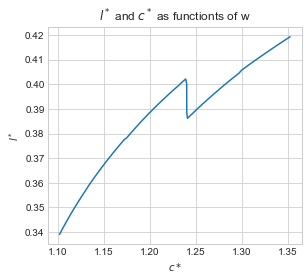

In [5]:
# Run the code for a range of w

# create list for w, c, and l
wliste = np.arange(0.5, 1.5, 0.01).tolist()
cliste = []
lliste = []

# fill lists with values
for w in wliste:
    sol = inauguralproject.solver(m,v,epsilon,tao0,tao1,kappa,w,cl,f)
    c = sol.x[0]
    l = sol.x[1]
    cliste.append(c)
    lliste.append(l)

# create figure
fig = plt.figure(figsize=(10,4))# figsize is in inches...
ax = fig.add_subplot(1,2,1)
ax.plot(cliste,lliste) # create surface plot in the axis
ax.set_title("$l^*$ and $c^*$ as functionts of w")
ax.set_xlabel('$c*$')
ax.set_ylabel('$l^*$')

# Question 3

ADD ANSWER.

In [9]:
#clearing total tax
Tax = 0

#Defining a function for Tax revenue
def T(w, l, tao0 = tao0, tao1 = tao1, kappa = kappa):
    return tao0*w*l+tao1*max(w*l-kappa,0)

# defining uniform distribution of wages
w_rand = np.random.uniform(0.5,1.5,size = 10000)

# calculation total tax revenue
for wrand in w_rand:
    sol = inauguralproject.solver(m,v,epsilon,tao0,tao1,kappa,wrand,cl,f)
    ltax = sol.x[1]
    Tax = Tax + T(wrand,ltax)
print(f'Total tax revenue = {Tax:.8f}')

Total tax revenue = 1629.64815404


# Question 4

ADD ANSWER.

In [ ]:
# code

# Question 5

ADD ANSWER.

In [ ]:
# code

# Conclusion

ADD CONCISE CONLUSION.